In [8]:
import sys
!conda install --yes --prefix {sys.prefix} diagrams

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /srv/conda/envs/notebook

  added / updated specs:
    - diagrams


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    atk-1.0-2.36.0             |       h3371d22_4         560 KB  conda-forge
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    diagrams-0.20.0            |   py37h89c1867_0        21.8 MB  conda-forge
    expat-2.4.1                |       h9c3ff4c_0         182 KB  conda-forge
    font-ttf-dejavu-sans-mono-2.37|       hab24e00_0         388 KB  conda-forge
    font-ttf-inconsolata-3.000 |       h77eed37_0          94 KB  conda-forge
    font-ttf-source-code-pro-2.038|       h77eed37_0         684 KB  conda-f

In [4]:
from diagrams import Cluster, Diagram, Edge
from diagrams.custom import Custom
from diagrams.aws.compute import EC2
from diagrams.aws.compute import Lambda
from diagrams.aws.integration import SQS
from diagrams.aws.storage import S3
from diagrams.aws.analytics import KinesisDataFirehose
from diagrams.aws.analytics import Kinesis
from diagrams.aws.compute import ECS

from diagrams.aws.management import Cloudwatch

In [5]:
from IPython import display

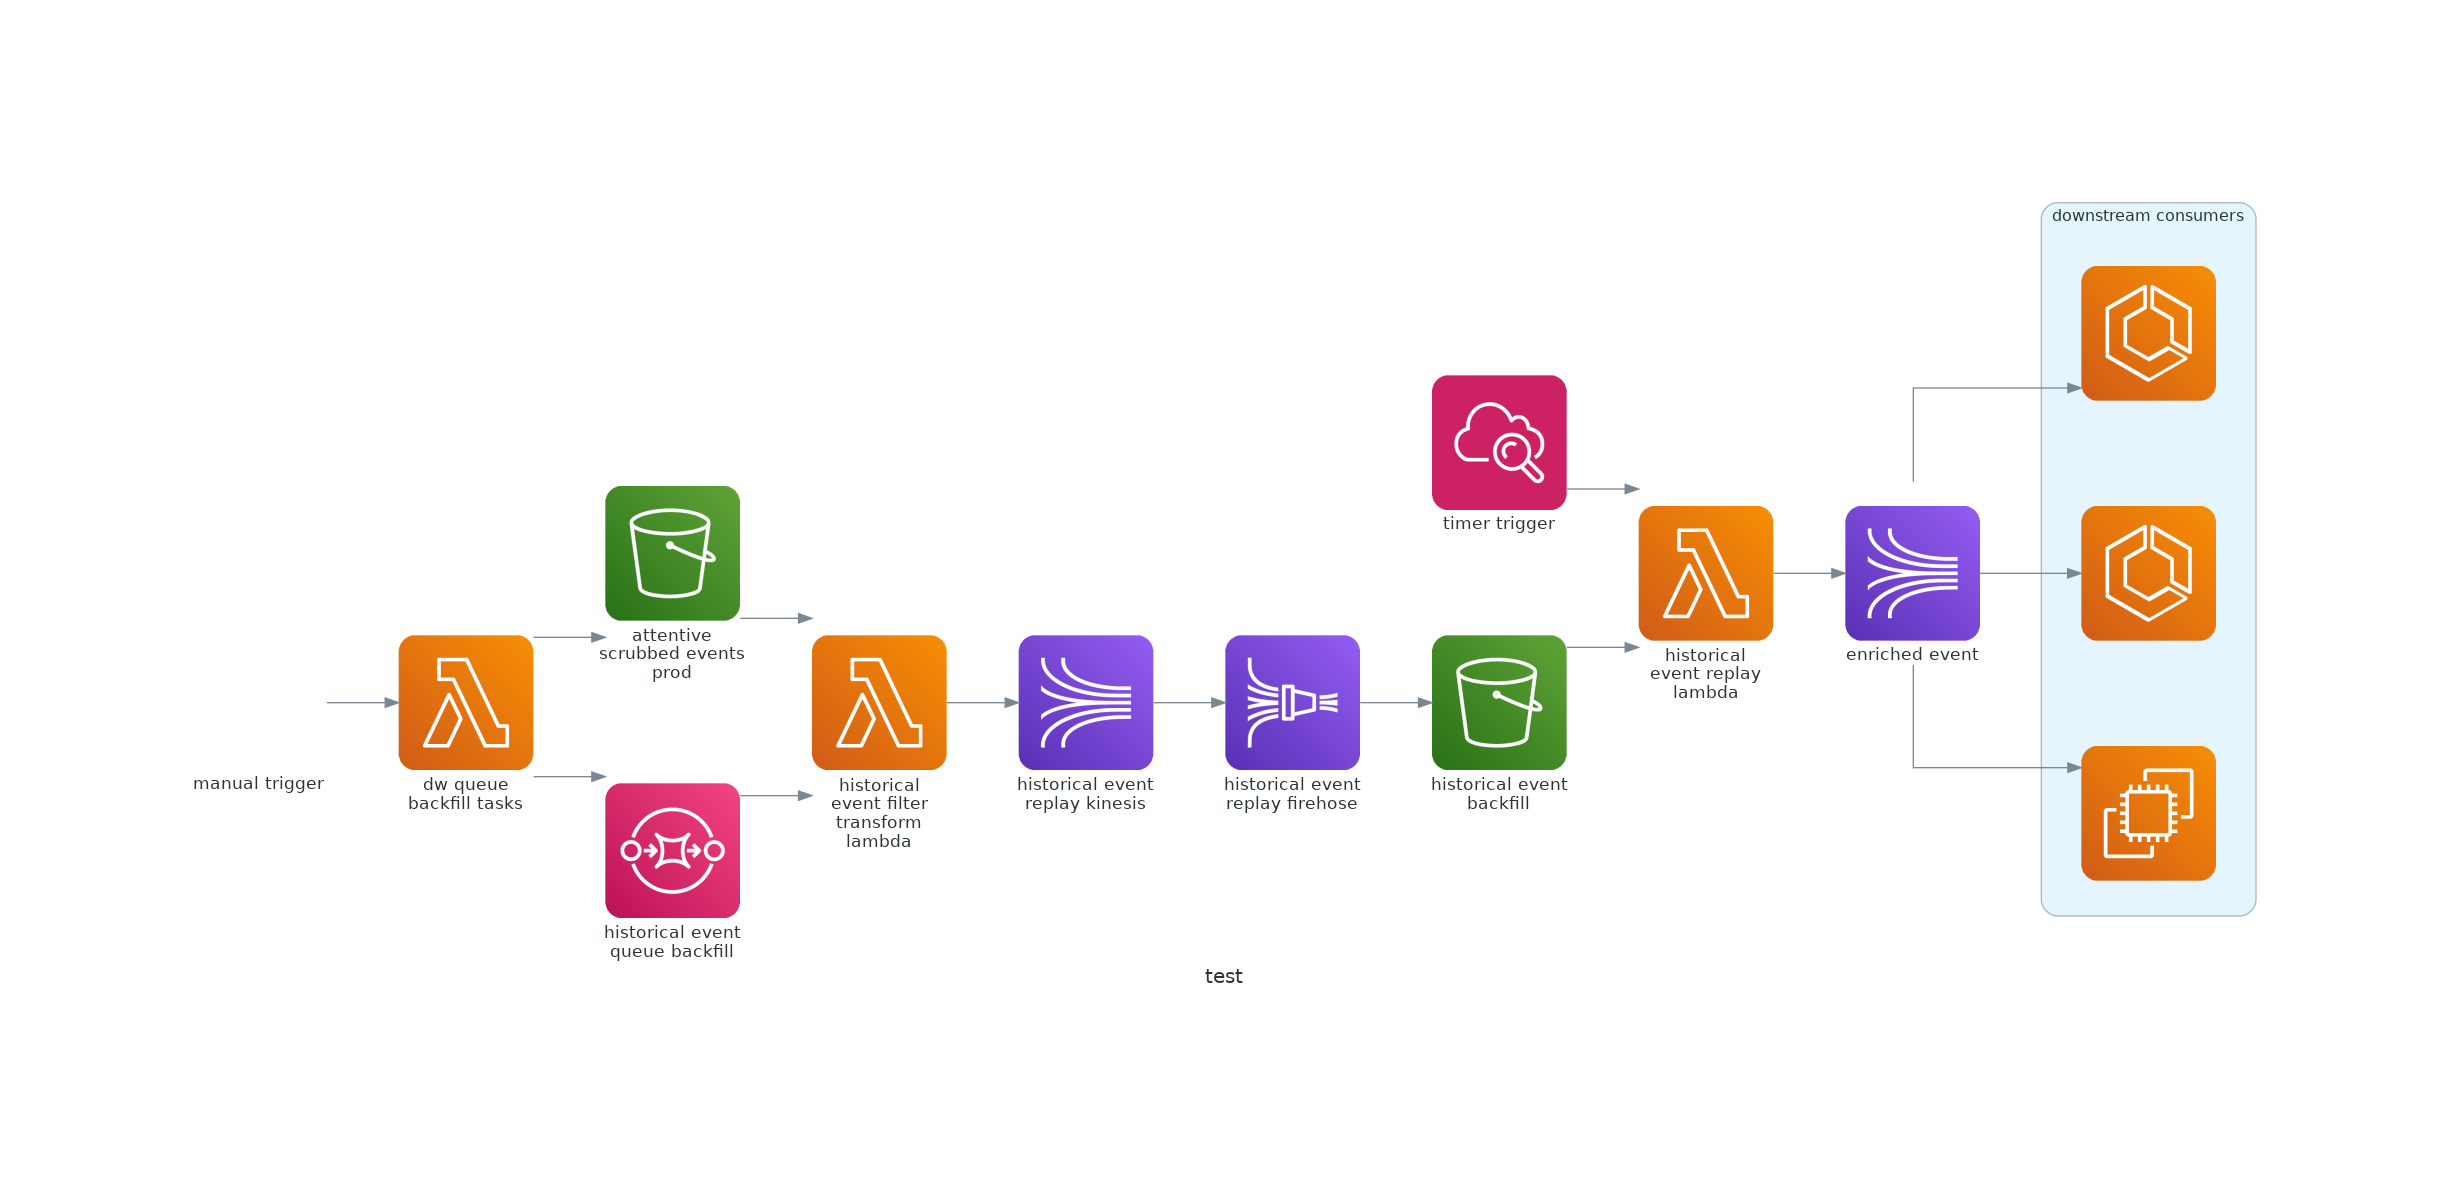

In [10]:
with Diagram("test", show=False):

    
    scrubbed_s3 = S3("attentive\nscrubbed events\nprod")
    historical_events_backfill = SQS("historical event\nqueue backfill")
    replay_lambda = Lambda("historical\nevent replay\nlambda")
    timer = Cloudwatch("timer trigger")

    with Cluster("downstream consumers"):
        downstream = [ECS(), ECS(), EC2()]

    Custom("manual trigger", "manual.png") \
            >> Lambda("dw queue\nbackfill tasks") \
            >> [scrubbed_s3, historical_events_backfill] \
            >> Lambda("historical\nevent filter\ntransform\nlambda") \
            >> Kinesis("historical event\nreplay kinesis") \
            >> KinesisDataFirehose("historical event\nreplay firehose") \
            >> S3("historical event\nbackfill") \
            >> replay_lambda \
            >> Kinesis("enriched event") \
            >> downstream

    timer >> replay_lambda
    
display.Image("./test.png")